In [27]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import cmath

In [28]:
def n_0(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)/(-np.exp(-x**2)+np.exp(-a)), 0, np.inf)[0]
n_0 = np.vectorize(n_0)
def n_2(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)*x**2/(-np.exp(-x**2)+np.exp(-a)), 0, np.inf)[0]
n_2 = np.vectorize(n_2)
def Cauchy(z,a):
    eps=1e-10
    s=integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(-np.exp(-x**2)+np.exp(-a))), -np.inf, z.real-eps)[0]
    s=s+integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(-np.exp(-x**2)+np.exp(-a))), z.real+eps,  np.inf)[0]
    return s/n_0(a)
I = np.vectorize(Cauchy)

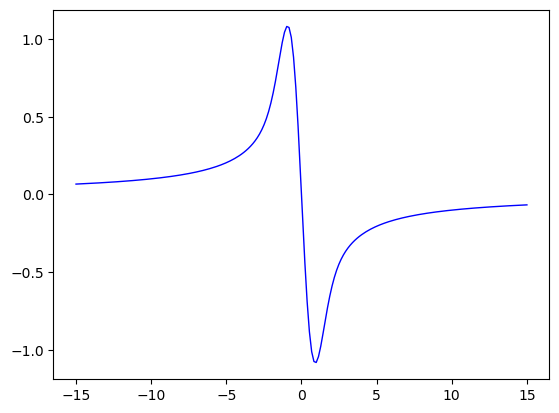

In [29]:
x=np.linspace(-15,15, 200)
y=I(x,-5)
plt.plot(x,y,color='blue',lw=1)
plt.show()

lambda_inf= 0.5555557037034622


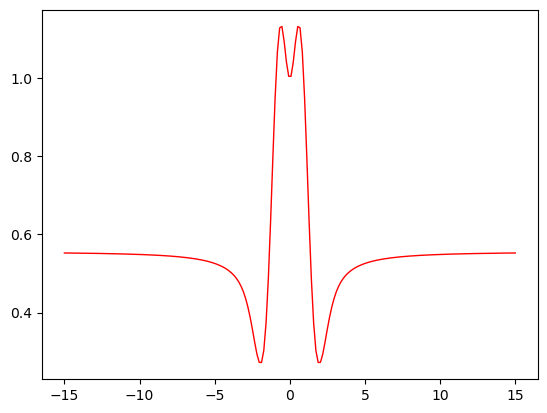

In [30]:
def lambda_x(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    print('lambda_inf=',(1-1/A+1/(A*v)**2).real)
    z=np.linspace(-15,15, 200)
    y=((1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z,a)/A**2)).real
    plt.plot(z,y,color='red',lw=1)
    plt.show()
lambda_x(1.5, 0.001, -5)

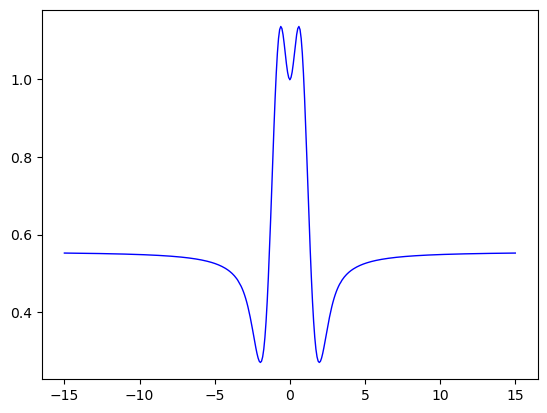

In [31]:
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_plus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    z=np.linspace(-15,0, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    plt.show()
lambda_z_plus(1.5, 0.005, -5)

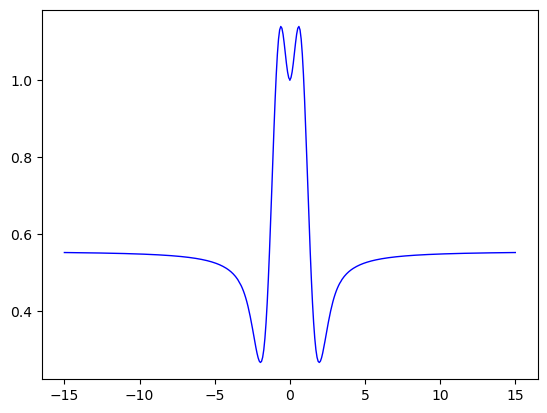

In [32]:
def Cauchy1(z, a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_minus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z, a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    z=np.linspace(-15,0, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z, a)/A**2).real
    plt.plot(z.real,y,color='blue',lw=1)
    plt.show()
lambda_z_minus(1.5, 0.005, -5)

lambda_inf= 0.5555592591083705


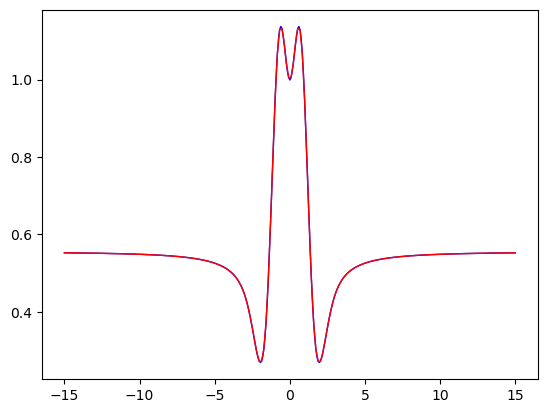

In [42]:
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z_plus(w, v, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    z=np.linspace(0,15, 200)-0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real+(1-(B*(z+0.0002j)**2)/A**2-(z+0.0002j)*B*((z+0.0002j)**2-A/B)*I1(z+0.0002j,a)/A**2).real
    plt.plot(z.real,y/2,color='blue',lw=1)
    z=np.linspace(-15,0, 200)+0.0001j
    y=(1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2).real+(1-(B*(z-0.0002j)**2)/A**2-(z-0.0002j)*B*((z-0.0002j)**2-A/B)*I1(z-0.0002j,a)/A**2).real
    plt.plot(z.real,y/2,color='blue',lw=1)
    lambda_x(1.5, 0.005, -5)
    plt.show()
lambda_z_plus(1.5, 0.005, -5)

In [35]:
def Cauchy2(z,a):
    s=integrate.quad(lambda x: (x**2+z.real**2-z.imag**2-2*x*z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)**2), -np.inf, np.inf)[0]
    s=s+2j*z.imag*integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)**2), -np.inf, np.inf)[0]
    return s/n_0(a)
J=np.vectorize(Cauchy2)
def Cauchy1(z,a):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((-np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    return s/n_0(a)
I1 = np.vectorize(Cauchy1)
def lambda_z(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z, a)/A**2)
def dlambda_dz(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return -2*B*z/A**2-B*(3*z**2-A/B)*I(z, a)/A**2-B*z*(z**2-A/B)*J(z, a)/A**2

In [39]:
def root(w, v, a, x1):
   eps=1e-15
   x2=0
   while abs(x1-x2)>eps:
      s=x1-lambda_z(w, v, x1, a)/dlambda_dz(w, v, x1, a)
      x2=x1
      x1=s
   print('корень:',x1)
   print(lambda_z(w, v, x1, a))
root(0.9, 0.001, -5, 0.0028-1.27j)

c:\Users\tanya\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


корень: (0.0006125573303681663-0.6356357431304366j)
(-5.736207968666404e-16-1.1926223897340549e-18j)
